In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns 
import geopandas as gpd

In [3]:
salary = pd.read_csv('dataset/clean_data/salary_concat.csv', sep=',')
salary_all = pd.read_csv('dataset/clean_data/salary_final.csv', sep=',')
population = pd.read_csv('dataset/clean_data/population_clean.csv', sep=',')
population_all = pd.read_csv('dataset/clean_data/population_final.csv', sep=',')
geography = pd.read_csv('dataset/clean_data/geography_clean.csv', sep=',')
establishment = pd.read_csv('dataset/clean_data/establishment_clean.csv', sep=',')


/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_92350/3830411365.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv('dataset/clean_data/population_clean.csv', sep=',')
/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_92350/3830411365.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  population_all = pd.read_csv('dataset/clean_data/population_final.csv', sep=',')


In [4]:
woman_managerial_position = pd.read_csv('dataset/clean_data/data_from_api_clean.csv', sep=',')
french_cat_job = pd.read_csv('dataset/clean_data/cat_job_webscrap.csv', sep=',')

In [5]:
woman_managerial_position.head()

,time_period,%_women_in_managerial_positions,%_women_in_senior_middle_management,%_women_in_junior_management
0,2004,35.89,33.46,2.43
1,2005,37.60,36.37,1.23
2,2006,37.88,37.01,0.87
3,2007,37.83,36.46,1.37
4,2008,38.50,36.79,1.71


In [6]:
population.head(3)


,CODGEO,LIBGEO,job_cat,gender,age_cat,total_population
0,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,1,medium,10
1,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,1,old,14
2,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,2,medium,5


In [7]:
population_all.head()

,CODGEO,LIBGEO,job_cat,age,gender,total_population,age_cat
0,1001,L'Abergement-Clémenciat,farmer,55,1,5,old
1,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,20,2,5,young
2,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,30,1,5,medium
3,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,40,2,5,medium
4,1001,L'Abergement-Clémenciat,artisan_merchant_entrepreneur,45,1,5,medium


In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826266 entries, 0 to 826265
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CODGEO            826266 non-null  object
 1   LIBGEO            826266 non-null  object
 2   job_cat           826266 non-null  object
 3   gender            826266 non-null  int64 
 4   age_cat           826266 non-null  object
 5   total_population  826266 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 37.8+ MB


In [9]:
salary.head(3)

,CODGEO,mean_salary,mean_salary_executive,mean_salary_middlemanagement,mean_salary_employee,mean_salary_worker,mean_salary_youngage,mean_salary_mediumage,mean_salary_oldage,gender
0,01004,13.043695,21.806580,14.368130,11.045518,10.763804,10.291297,13.234401,14.192028,2
1,01004,16.202197,26.693345,18.274408,11.761411,12.095672,11.286232,16.130620,19.226540,1
2,01007,16.406488,25.832202,17.070232,11.757341,12.881610,10.487221,16.229187,19.324302,1


In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CODGEO                        10842 non-null  object 
 1   mean_salary                   10842 non-null  float64
 2   mean_salary_executive         10842 non-null  float64
 3   mean_salary_middlemanagement  10842 non-null  float64
 4   mean_salary_employee          10842 non-null  float64
 5   mean_salary_worker            10842 non-null  float64
 6   mean_salary_youngage          10842 non-null  float64
 7   mean_salary_mediumage         10842 non-null  float64
 8   mean_salary_oldage            10842 non-null  float64
 9   gender                        10842 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 847.2+ KB


In [11]:
establishment.head(3)

,CODGEO,total_establishment,micro_firms,small_firms,medium_firms,large_firms,agriculture_est,industry_est,construction_est,commerce_transport_est,public_est
0,01001,14,12,0,0,0,2,0,3,7,2
1,01002,4,3,0,0,0,1,0,0,2,1
2,01004,586,419,110,19,2,1,31,58,410,86


In [12]:
establishment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34980 entries, 0 to 34979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CODGEO                  34980 non-null  object
 1   total_establishment     34980 non-null  int64 
 2   micro_firms             34980 non-null  int64 
 3   small_firms             34980 non-null  int64 
 4   medium_firms            34980 non-null  int64 
 5   large_firms             34980 non-null  int64 
 6   agriculture_est         34980 non-null  int64 
 7   industry_est            34980 non-null  int64 
 8   construction_est        34980 non-null  int64 
 9   commerce_transport_est  34980 non-null  int64 
 10  public_est              34980 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 2.9+ MB


In [13]:
geography.head(3)

,CODGEO,postcode,town_fullname,town_name,latitude,longitude,code_departement,departement_name,code_region,region_name
0,1001,1400,L'Abergement-Clémenciat,Abergement-Clémenciat,46.153426,4.926114,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,1640,L'Abergement-de-Varey,Abergement-de-Varey,46.009188,5.428017,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,1500,Ambérieu-en-Bugey,Ambérieu-en-Bugey,45.960848,5.372926,1,Ain,84.0,Auvergne-Rhône-Alpes


In [14]:
geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36370 entries, 0 to 36369
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODGEO            36370 non-null  object 
 1   postcode          36370 non-null  int64  
 2   town_fullname     36370 non-null  object 
 3   town_name         36370 non-null  object 
 4   latitude          36216 non-null  float64
 5   longitude         36216 non-null  float64
 6   code_departement  36363 non-null  object 
 7   departement_name  36218 non-null  object 
 8   code_region       36218 non-null  float64
 9   region_name       36218 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.8+ MB


In [15]:
print(population.columns)
print(salary.columns)
print(establishment.columns)
print(geography.columns)

Index(['CODGEO', 'LIBGEO', 'job_cat', 'gender', 'age_cat', 'total_population'], dtype='object')
Index(['CODGEO', 'mean_salary', 'mean_salary_executive',
       'mean_salary_middlemanagement', 'mean_salary_employee',
       'mean_salary_worker', 'mean_salary_youngage', 'mean_salary_mediumage',
       'mean_salary_oldage', 'gender'],
      dtype='object')
Index(['CODGEO', 'total_establishment', 'micro_firms', 'small_firms',
       'medium_firms', 'large_firms', 'agriculture_est', 'industry_est',
       'construction_est', 'commerce_transport_est', 'public_est'],
      dtype='object')
Index(['CODGEO', 'postcode', 'town_fullname', 'town_name', 'latitude',
       'longitude', 'code_departement', 'departement_name', 'code_region',
       'region_name'],
      dtype='object')


In [16]:
print(population_all.columns)
print(salary_all.columns)

Index(['CODGEO', 'LIBGEO', 'job_cat', 'age', 'gender', 'total_population',
       'age_cat'],
      dtype='object')
Index(['CODGEO', 'mean_salary', 'mean_salary_male', 'mean_salary_female',
       'mean_salary_executive', 'mean_salary_executive_female',
       'mean_salary_executive_male', 'mean_salary_middlemanagement',
       'mean_salary_middlemanagement_female',
       'mean_salary_middlemanagement_male', 'mean_salary_employee',
       'mean_salary_employee_female', 'mean_salary_employee_male',
       'mean_salary_worker', 'mean_salary_worker_female',
       'mean_salary_worker_male', 'mean_salary_youngage',
       'mean_salary_youngage_female', 'mean_salary_youngage_male',
       'mean_salary_mediumage', 'mean_salary_mediumage_female',
       'mean_salary_mediumage_male', 'mean_salary_oldage',
       'mean_salary_oldage_female', 'mean_salary_oldage_male'],
      dtype='object')


In [17]:
print(woman_managerial_position.columns)
print(french_cat_job.columns)


Index(['time_period', '%_women_in_managerial_positions',
       '%_women_in_senior_middle_management', '%_women_in_junior_management'],
      dtype='object')
Index(['cat_job_id', 'french_cat_job', 'sub_cat_job_id', 'french_sub_cat_job'], dtype='object')


In [53]:
print(population.shape)
print(salary.shape)
print(establishment.shape)
print(geography.shape)

(826266, 6)
(10842, 10)
(34980, 11)
(36370, 10)


In [19]:
print(population_all.shape)
print(salary_all.shape)

(1738965, 7)
(5421, 25)


In [20]:
print(woman_managerial_position.shape)
print(french_cat_job.shape)

(19, 4)
(42, 4)


In [21]:
print(population.isnull().sum())
print(salary.isnull().sum())
print(establishment.isnull().sum())
print(geography.isnull().sum())


CODGEO              0
LIBGEO              0
job_cat             0
gender              0
age_cat             0
total_population    0
dtype: int64
CODGEO                          0
mean_salary                     0
mean_salary_executive           0
mean_salary_middlemanagement    0
mean_salary_employee            0
mean_salary_worker              0
mean_salary_youngage            0
mean_salary_mediumage           0
mean_salary_oldage              0
gender                          0
dtype: int64
CODGEO                    0
total_establishment       0
micro_firms               0
small_firms               0
medium_firms              0
large_firms               0
agriculture_est           0
industry_est              0
construction_est          0
commerce_transport_est    0
public_est                0
dtype: int64
CODGEO                0
postcode              0
town_fullname         0
town_name             0
latitude            154
longitude           154
code_departement      7
departement_n

In [22]:
print(population.nunique())
print(geography.nunique())
print(salary.nunique())
print(establishment.nunique())

CODGEO              34975
LIBGEO              32723
job_cat                 8
gender                  2
age_cat                 3
total_population     4184
dtype: int64
CODGEO              36013
postcode             6329
town_fullname       33610
town_name           33440
latitude            35921
longitude           35921
code_departement      104
departement_name      101
code_region            18
region_name            18
dtype: int64
CODGEO                           5421
mean_salary                     10842
mean_salary_executive           10842
mean_salary_middlemanagement    10842
mean_salary_employee            10842
mean_salary_worker              10842
mean_salary_youngage            10842
mean_salary_mediumage           10842
mean_salary_oldage              10842
gender                              2
dtype: int64
CODGEO                    34980
total_establishment        1038
micro_firms                 853
small_firms                 389
medium_firms                168
large

In [23]:
# réorganiser les colonnes dans l'ordre spécifié
salary = salary.loc[:, ['CODGEO', 'gender', 'mean_salary', 'mean_salary_executive',
                        'mean_salary_middlemanagement', 'mean_salary_employee',
                        'mean_salary_worker', 'mean_salary_youngage', 
                        'mean_salary_mediumage', 'mean_salary_oldage']]

# Sélectionner toutes les colonnes sauf 'CODGEO' et 'gender'
colonnes_a_arrondir = [colonne for colonne in salary.columns if colonne not in ['CODGEO', 'gender']]

# Arrondir les valeurs des colonnes sélectionnées au deuxième décimale
salary[colonnes_a_arrondir] = salary[colonnes_a_arrondir].round(2)

# Remplacer les valeurs 1 par 'male' et 2 par 'female' dans la colonne 'gender'
salary['gender'] = salary['gender'].replace({1: 'male', 2: 'female'})

# Afficher les premières lignes du DataFrame pour vérifier l'ordre des colonnes
salary.head(2)


,CODGEO,gender,mean_salary,mean_salary_executive,mean_salary_middlemanagement,mean_salary_employee,mean_salary_worker,mean_salary_youngage,mean_salary_mediumage,mean_salary_oldage
0,01004,female,13.04,21.81,14.37,11.05,10.76,10.29,13.23,14.19
1,01004,male,16.20,26.69,18.27,11.76,12.10,11.29,16.13,19.23


In [24]:
salary_by_gender = salary.groupby('gender').describe().round(2)

salary_by_gender

mean_salary                                                  \
             count   mean   std    min    25%    50%    75%    max   
gender                                                               
female      5421.0  13.82  2.34  10.40  12.36  13.18  14.54  34.60   
male        5421.0  16.60  3.88  10.78  14.28  15.65  17.69  60.48   

       mean_salary_executive         ... mean_salary_mediumage         \
                       count   mean  ...                   75%    max   
gender                               ...                                
female                5421.0  22.04  ...                 14.55  34.71   
male                  5421.0  26.77  ...                 17.15  50.32   

       mean_salary_oldage                                                 
                    count   mean   std   min    25%    50%    75%    max  
gender                                                                    
female             5421.0  15.07  3.04  10.3  13.16  14.28  15.97  40.40  
male               5421.0  19.66  5.81  11.8  16.25  18.15  21.30  89.56  

[2 rows x 64 columns]

In [25]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CODGEO                        10842 non-null  object 
 1   gender                        10842 non-null  object 
 2   mean_salary                   10842 non-null  float64
 3   mean_salary_executive         10842 non-null  float64
 4   mean_salary_middlemanagement  10842 non-null  float64
 5   mean_salary_employee          10842 non-null  float64
 6   mean_salary_worker            10842 non-null  float64
 7   mean_salary_youngage          10842 non-null  float64
 8   mean_salary_mediumage         10842 non-null  float64
 9   mean_salary_oldage            10842 non-null  float64
dtypes: float64(8), object(2)
memory usage: 847.2+ KB


In [26]:
# Sélectionner les colonnes pertinentes en excluant 'CODGEO'
columns_to_average = salary.columns.difference(['CODGEO','gender'])

# Calculer la moyenne de chaque colonne par genre
avg_salary_by_gender = salary.groupby('gender')[columns_to_average].mean().round(2)

# Afficher le résultat
avg_salary_by_gender


,mean_salary,mean_salary_employee,mean_salary_executive,mean_salary_mediumage,mean_salary_middlemanagement,mean_salary_oldage,mean_salary_worker,mean_salary_youngage
gender,,,,,,,,
female,13.82,11.40,22.04,13.81,14.68,15.07,10.78,10.25
male,16.60,12.06,26.77,16.07,16.82,19.66,12.39,10.84


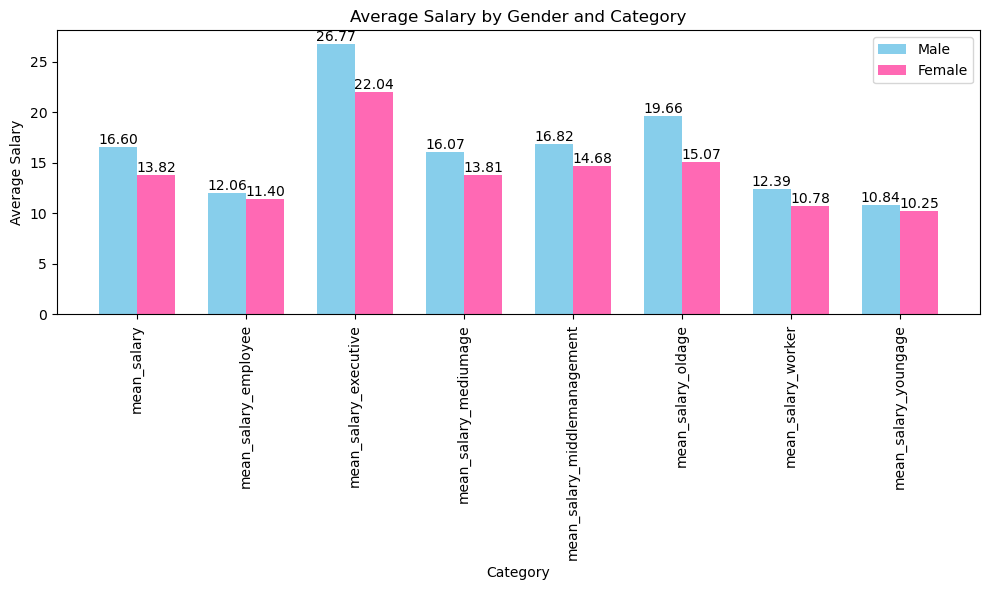

In [27]:
# Séparation des données par genre
male_data = avg_salary_by_gender.loc['male']
female_data = avg_salary_by_gender.loc['female']

# Nombre de colonnes (nombre de catégories)
num_columns = len(male_data)

# Largeur des barres
bar_width = 0.35

# Positions des barres sur l'axe x
indices = np.arange(num_columns)

# Tracer les barres
plt.figure(figsize=(10, 6))
bars1 = plt.bar(indices, male_data, bar_width, label='Male', color='skyblue')
bars2 = plt.bar(indices + bar_width, female_data, bar_width, label='Female', color='hotpink')

# Ajouter les valeurs sur chaque barre
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

# Ajouter des titres et étiquettes d'axes
plt.title('Average Salary by Gender and Category')
plt.xlabel('Category')
plt.ylabel('Average Salary')
plt.xticks(indices + bar_width / 2, male_data.index)  # Position des étiquettes sur l'axe x
plt.legend()  # Ajouter une légende
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x

# Afficher le graphique
plt.tight_layout()
plt.show()


In [28]:
establishment_by_town = establishment.describe().round(2)
establishment_by_town

,total_establishment,micro_firms,small_firms,medium_firms,large_firms,agriculture_est,industry_est,construction_est,commerce_transport_est,public_est
count,34980.00,34980.00,34980.00,34980.00,34980.00,34980.00,34980.00,34980.00,34980.00,34980.00
mean,64.60,46.90,9.25,1.93,0.39,3.10,4.24,7.03,41.87,8.36
std,386.04,279.72,56.35,12.20,3.38,5.58,16.03,29.79,307.67,41.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
50%,11.00,9.00,1.00,0.00,0.00,2.00,1.00,2.00,3.00,2.00
75%,29.00,22.00,4.00,1.00,0.00,4.00,3.00,5.00,13.00,4.00
max,21566.00,15633.00,3132.00,648.00,187.00,189.00,751.00,1750.00,19539.00,2163.00


In [29]:

# Remplacer les virgules par des points
#population['total_population'] = population['total_population'].str.replace(',', '.').str.replace(' ', '')

In [30]:
# Replace non-numeric values with NaN
population['total_population'] = population['total_population'].replace('-', np.nan)


In [31]:
# Convertir les chaînes en flottants
population['total_population'] = population['total_population'].astype(float)

In [32]:
# Remplacer les valeurs 1 par 'male' et 2 par 'female' dans la colonne 'gender'
population['gender'] = population['gender'].replace({1: 'male', 2: 'female'})

In [33]:
population_by_all = population.groupby(['job_cat','age_cat','gender'])['total_population'].sum()

population_by_all

job_cat                        age_cat  gender
artisan_merchant_entrepreneur  medium   female     355995.0
                                        male       816838.0
                               old      female     246837.0
                                        male       609905.0
                               young    female      19459.0
                                        male        38118.0
employee                       medium   female    3825130.0
                                        male      1429879.0
                               old      female    2145240.0
                                        male       554705.0
                               young    female     786652.0
                                        male       413325.0
executive                      medium   female    1790409.0
                                        male      2190361.0
                               old      female     753934.0
                                        male      115

In [34]:
population_by_job_gender = population.groupby(['job_cat','gender'])['total_population'].sum()

population_by_job_gender

job_cat                        gender
artisan_merchant_entrepreneur  female     622291.0
                               male      1464861.0
employee                       female    6757022.0
                               male      2397909.0
executive                      female    2640781.0
                               male      3458188.0
farmer                         female     109076.0
                               male       307800.0
middle_management              female    4526601.0
                               male      3774647.0
retired                        female    8423531.0
                               male      7032206.0
unemployed                     female    6014743.0
                               male      3960895.0
worker                         female    1353777.0
                               male      5380574.0
Name: total_population, dtype: float64

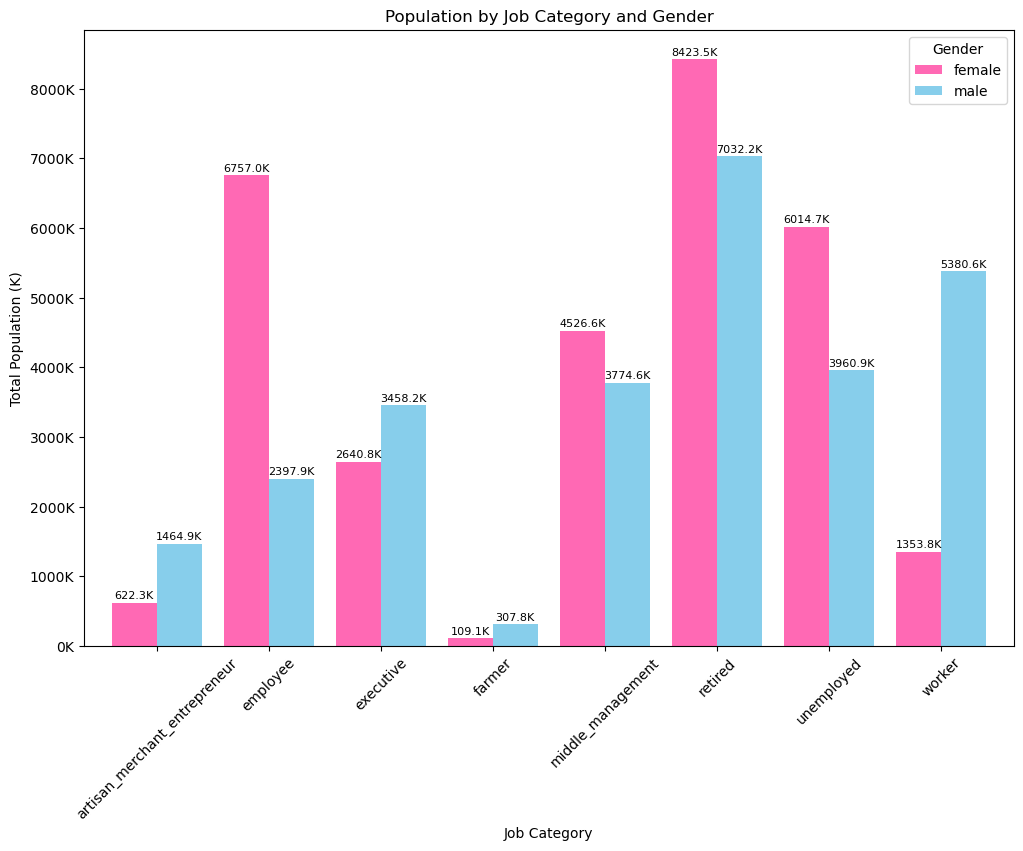

In [35]:
# Réorganiser les données pour les barres groupées
population_by_job_gender_unstacked = population_by_job_gender.unstack()

# Tracer le graphique à barres groupées avec des couleurs personnalisées
ax = population_by_job_gender_unstacked.plot(kind='bar', figsize=(12, 8), width=0.8,
                                            color=['hotpink', 'skyblue'])

# Ajouter un titre et des étiquettes d'axes
plt.title('Population by Job Category and Gender')
plt.xlabel('Job Category')
plt.ylabel('Total Population (K)')  # Mettre en milliers (K)
plt.xticks(rotation=45)  # Pour faire pivoter les étiquettes de l'axe x

# Définir le format de l'axe des ordonnées en milliers (K)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000)))

# Afficher les valeurs sur les barres
for p in ax.patches:
    ax.annotate(f"{p.get_height() / 1000:.1f}K", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Afficher le graphique
plt.legend(title='Gender')
plt.show()



In [36]:
population_by_gender = population.groupby(['gender'])['total_population'].sum()
population_by_gender

gender
female    30447822.0
male      27777080.0
Name: total_population, dtype: float64

/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_92350/2309107829.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count + 0.5, f'{percentages[i]:.2f}%', ha='center')


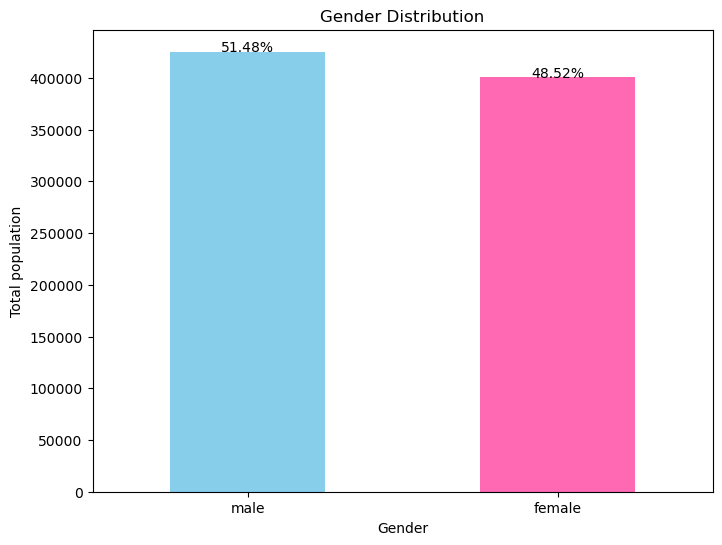

In [37]:
# Calculer les pourcentages
counts = population['gender'].value_counts()
total = counts.sum()
percentages = (counts / total) * 100

# Créer le diagramme à barres avec les occurrences
ax = counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'hotpink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total population')
plt.xticks(rotation=0)

# Afficher les pourcentages au-dessus des barres
for i, count in enumerate(counts):
    ax.text(i, count + 0.5, f'{percentages[i]:.2f}%', ha='center')

plt.show()


In [38]:
population_by_job_cat = population.groupby(['job_cat'])['total_population'].sum()
population_by_job_cat

job_cat
artisan_merchant_entrepreneur     2087152.0
employee                          9154931.0
executive                         6098969.0
farmer                             416876.0
middle_management                 8301248.0
retired                          15455737.0
unemployed                        9975638.0
worker                            6734351.0
Name: total_population, dtype: float64

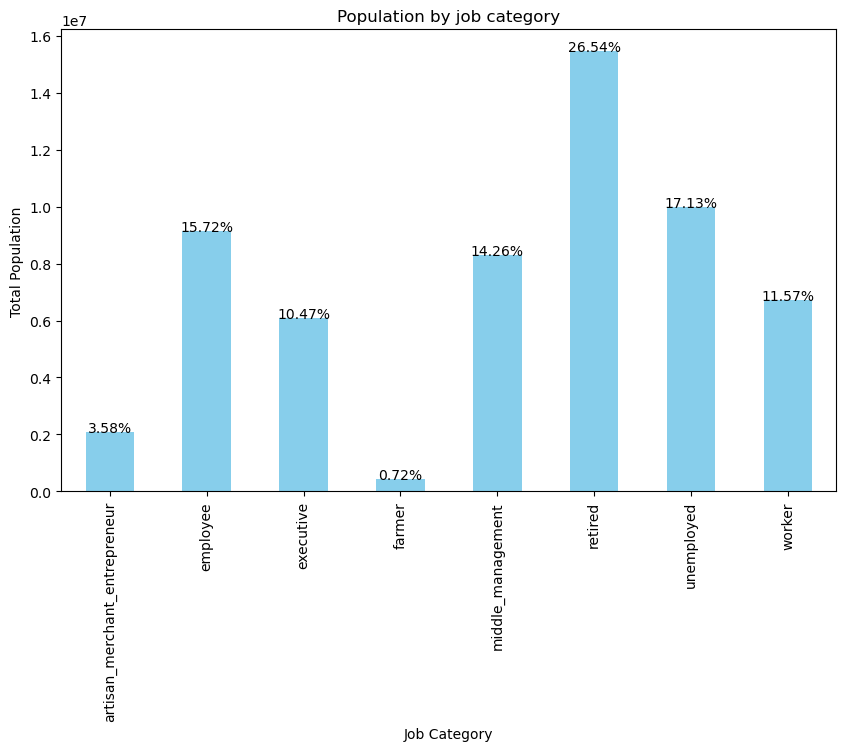

In [39]:
# Calculer le pourcentage de chaque catégorie d'emploi par rapport à la population totale
percentage_by_job_cat = (population_by_job_cat / population_by_job_cat.sum()) * 100

# Tracer le graphique à barres
ax = population_by_job_cat.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Ajouter un titre et des étiquettes d'axes
plt.title('Population by job category')
plt.xlabel('Job Category')
plt.ylabel('Total Population')
plt.xticks(rotation=90)

# Ajouter le pourcentage au-dessus de chaque barre
for i, v in enumerate(population_by_job_cat):
    ax.text(i, v + 1, f'{percentage_by_job_cat.iloc[i]:.2f}%', ha='center')

# Afficher le graphique
plt.show()

In [40]:
population_by_age = population.groupby(['age_cat'])['total_population'].sum()
population_by_age

age_cat
medium    22089029.0
old       27717928.0
young      8417945.0
Name: total_population, dtype: float64

In [41]:

# Remplacer les valeurs 1 par 'male' et 2 par 'female' dans la colonne 'gender'
population_all['gender'] = population_all['gender'].replace({1: 'male', 2: 'female'})
population_all.columns

Index(['CODGEO', 'LIBGEO', 'job_cat', 'age', 'gender', 'total_population',
       'age_cat'],
      dtype='object')

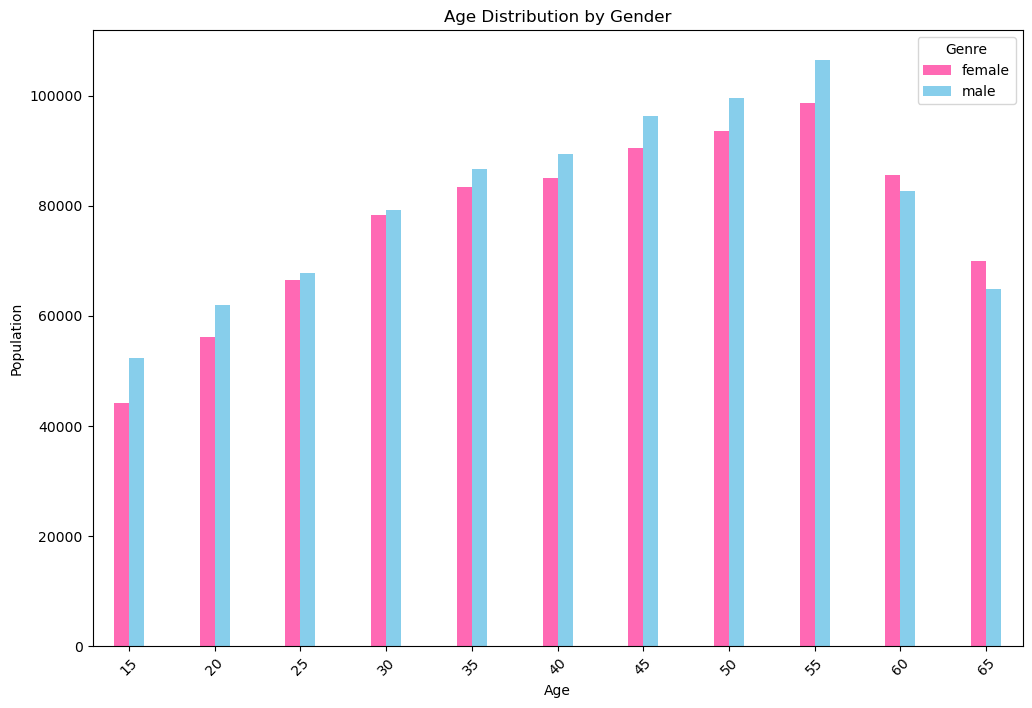

In [42]:
population_by_age_detail = population_all.groupby(['age', 'gender']).size().unstack()

# Calculer la tendance pour chaque groupe (genre)
trend_male = np.polyfit(range(len(population_by_age_detail.index)), population_by_age_detail['male'], 1)
trend_female = np.polyfit(range(len(population_by_age_detail.index)), population_by_age_detail['female'], 1)

# Tracer le graphique à barres groupées avec des couleurs personnalisées
ax = population_by_age_detail.plot(kind='bar', figsize=(12, 8), width=0.35, color=[ 'hotpink','skyblue'])


# Ajouter un titre et des étiquettes d'axes
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Population')

# Afficher le graphique
plt.legend(title='Genre')
plt.xticks(range(len(population_by_age_detail.index)), population_by_age_detail.index, rotation=45)
plt.show()


In [43]:
# Regrouper par LIBGEO et calculer la somme de la population pour chaque groupe
total_population_by_town = population.groupby('LIBGEO')['total_population'].sum()

# Convertir la série en DataFrame
total_population_by_town = total_population_by_town.to_frame().reset_index()

# Renommer la colonne contenant la somme de la population
total_population_by_town = total_population_by_town.rename(columns={'total_population': 'total_population_by_town'})

# Trier le DataFrame par ordre décroissant des sommes de population
total_population_by_town = total_population_by_town.sort_values(by='total_population_by_town', ascending=False)

# Réinitialiser l'index
total_population_by_town.reset_index(drop=True, inplace=True)

# Afficher le DataFrame
top10_population_by_town = total_population_by_town.head(10)
top10_population_by_town

,LIBGEO,total_population_by_town
0,Paris,1857693.0
1,Marseille,713332.0
2,Lyon,443172.0
3,Toulouse,425357.0
4,Nice,290029.0
5,Nantes,268831.0
6,Montpellier,252282.0
7,Strasbourg,240981.0
8,Bordeaux,224055.0
9,Saint-Denis,209464.0


In [44]:
# Fusionner les DataFrames salary et geography sur la colonne CODGEO
merged_data = pd.merge(salary, geography[['CODGEO', 'departement_name']], on='CODGEO', how='left')

# Grouper les données par departement_name et calculer la moyenne de mean_salary pour chaque groupe
mean_salary_by_departement = merged_data.groupby('departement_name')['mean_salary'].mean()

# Trier les moyennes de salaire par ordre décroissant
mean_salary_by_departement = mean_salary_by_departement.sort_values(ascending=False)

# Sélectionner les 10 premiers departement_name avec les moyennes de mean_salary les plus élevées
top_10_departments_mean_salary = mean_salary_by_departement.head(10)

# Convertir la série en DataFrame avec un index explicite
top_10_departments_mean_salary = top_10_departments_mean_salary.to_frame().reset_index()

# Renommer les colonnes
top_10_departments_mean_salary.columns = ['departement_name', 'mean_salary']

# Afficher le DataFrame
top_10_departments_mean_salary



,departement_name,mean_salary
0,Paris,29.967381
1,Hauts-de-Seine,25.999028
2,Yvelines,22.587304
3,Val-de-Marne,18.976771
4,Essonne,18.536250
5,Rhône,18.295833
6,Val-d'Oise,17.946882
7,Seine-et-Marne,17.078806
8,Haute-Garonne,16.873793
9,Isère,16.648356


In [45]:

# Merge the establishment DataFrame with the geography DataFrame
est_geo_merge = pd.merge(establishment, geography[['CODGEO', 'departement_name']], on='CODGEO', how='inner')

# Group by 'departement_name' and calculate the sum of 'total_establishment' for each department
est_geo_grouped = est_geo_merge.groupby('departement_name')['total_establishment'].sum().reset_index()

# Sort the DataFrame by 'total_establishment' in descending order and select the top 10 rows
top_10_est_by_departments = est_geo_grouped.sort_values(by='total_establishment', ascending=False).head(10)

top_10_est_by_departments


,departement_name,total_establishment
66,Paris,190996
30,Haute-Garonne,139003
63,Nord,122573
4,Bouches-du-Rhône,117790
25,Gironde,114380
38,Hérault,79080
48,Loire-Atlantique,78788
71,Rhône,72302
44,La Réunion,61580
3,Bas-Rhin,60879


/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_92350/925474933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(establishment.total_establishment)


<Axes: xlabel='total_establishment', ylabel='Density'>

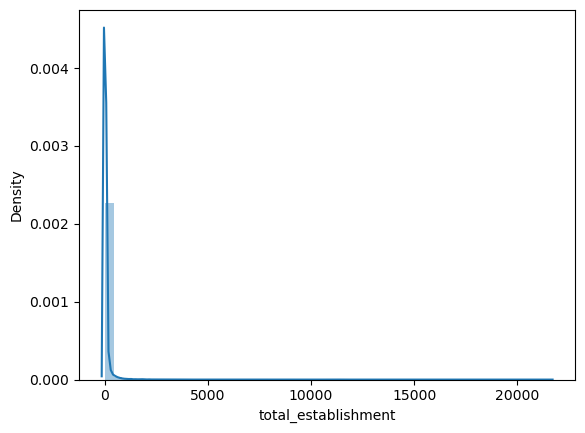

In [46]:
# The distribution of total number of firms in town
sns.distplot(establishment.total_establishment)

From the distribution of total number of firms in town, we can find that most of firms are not in a very big scale, so we need to foucus on the firms with relative low number.

/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_92350/85205214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target.total_establishment,axlabel='Total Number of Firms')


<Axes: xlabel='Total Number of Firms', ylabel='Density'>

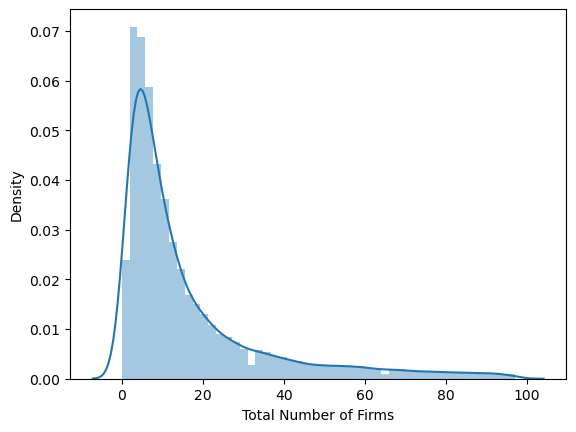

In [47]:
target = establishment[establishment.total_establishment < establishment.total_establishment.quantile(0.9)]
sns.distplot(target.total_establishment,axlabel='Total Number of Firms')

Most of firms' scale are 'Small' and 'Medium', with number around 200.

In [48]:
establishment.head()

,CODGEO,total_establishment,micro_firms,small_firms,medium_firms,large_firms,agriculture_est,industry_est,construction_est,commerce_transport_est,public_est
0,01001,14,12,0,0,0,2,0,3,7,2
1,01002,4,3,0,0,0,1,0,0,2,1
2,01004,586,419,110,19,2,1,31,58,410,86
3,01005,46,33,5,0,0,2,4,10,23,7
4,01006,2,2,0,0,0,0,0,0,1,1


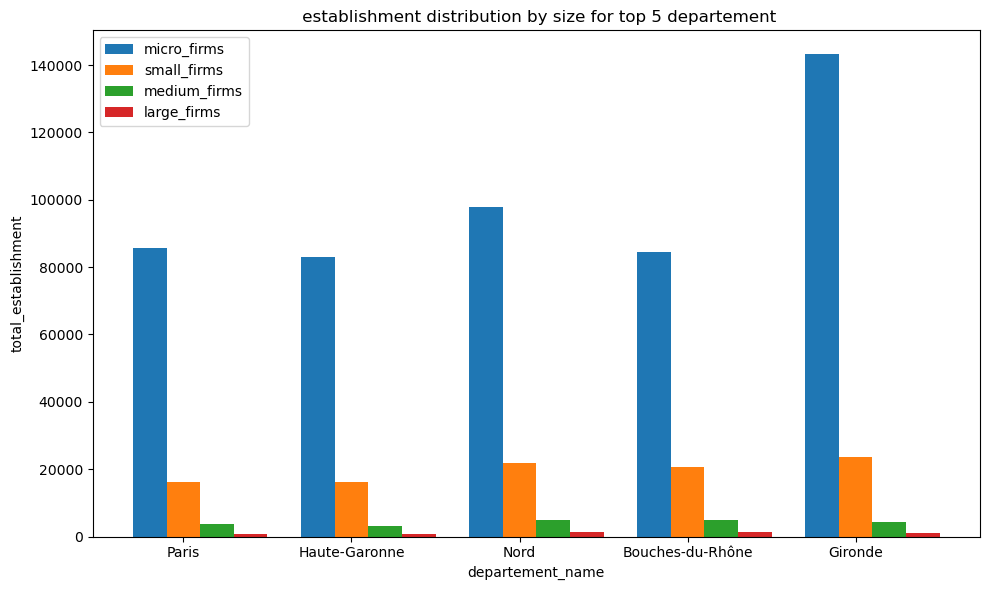

In [49]:

# Sélectionner les cinq villes avec le plus grand nombre total d'établissements
top_5_departement = est_geo_merge.groupby('departement_name')['total_establishment'].sum().nlargest(5).index

# Filtrer les données pour inclure uniquement les cinq villes sélectionnées
filtered_data = est_geo_merge[est_geo_merge['departement_name'].isin(top_5_departement)]

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres combinées pour chaque ville avec les totaux des différents types d'établissements
bar_width = 0.2
index = range(len(top_5_departement))
est_types = ['micro_firms', 'small_firms', 'medium_firms', 'large_firms']
for i, est_type in enumerate(est_types):
    ax.bar([x + i * bar_width for x in index], filtered_data.groupby('departement_name')[est_type].sum(), bar_width, label=est_type)

# Ajouter des étiquettes et des titres
plt.xlabel('departement_name')
plt.ylabel('total_establishment')
plt.title(' establishment distribution by size for top 5 departement')
plt.xticks([x + bar_width for x in index], top_5_departement)
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()



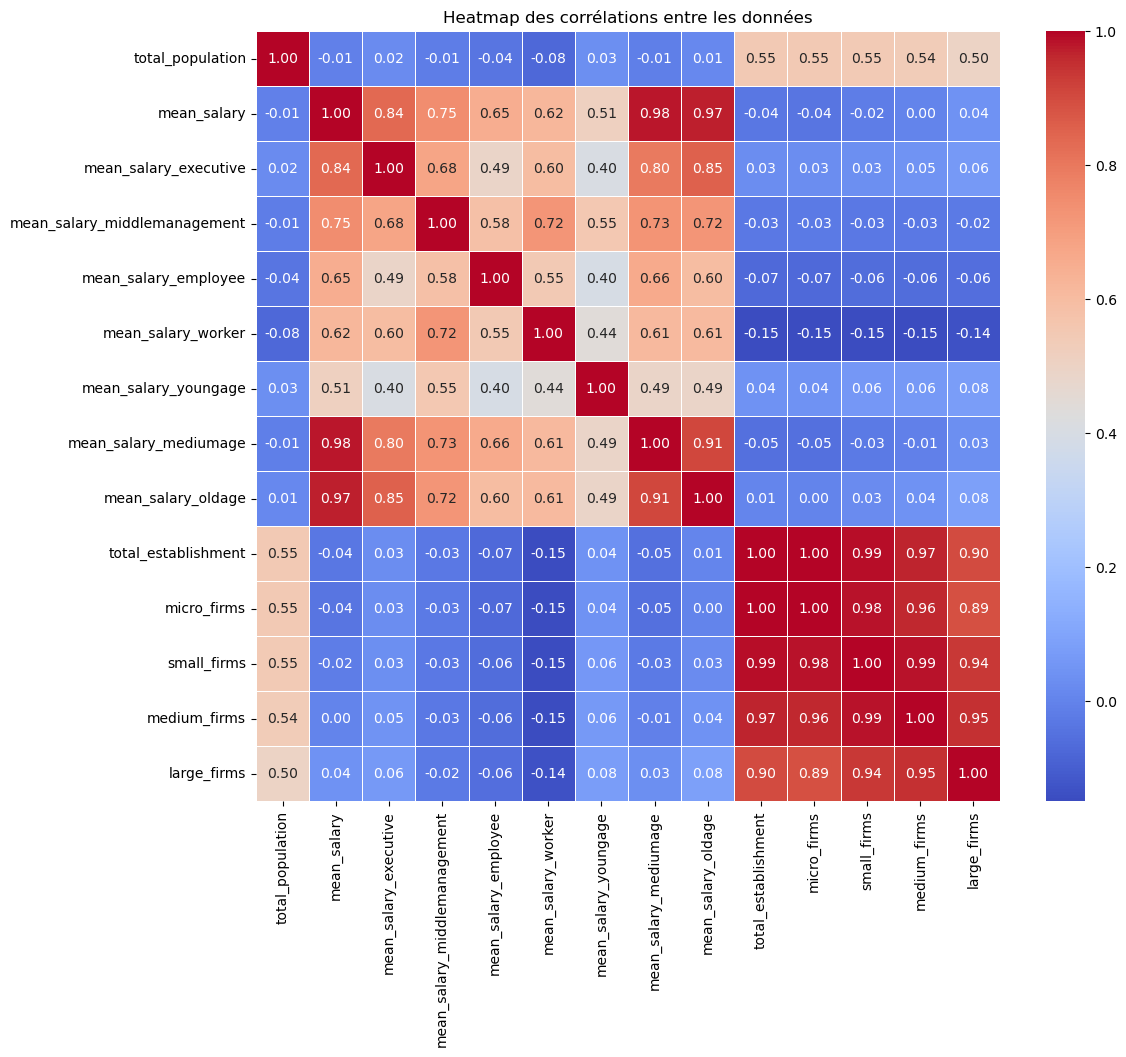

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Fusionnez les DataFrames sur la colonne en commun 'CODGEO'
merged_data = population.merge(salary, on='CODGEO').merge(establishment, on='CODGEO').merge(geography, on='CODGEO')

# Étape 2 : Sélectionnez les colonnes que vous souhaitez inclure dans la heatmap
selected_columns = ['total_population', 'mean_salary', 'mean_salary_executive', 'mean_salary_middlemanagement', 
                    'mean_salary_employee', 'mean_salary_worker', 'mean_salary_youngage', 'mean_salary_mediumage', 
                    'mean_salary_oldage', 'total_establishment', 'micro_firms', 'small_firms', 'medium_firms', 'large_firms']

# Étape 3 : Calculez la matrice de corrélation pour ces colonnes
correlation_matrix = merged_data[selected_columns].corr()

# Étape 4 : Tracez la heatmap de la matrice de corrélation
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap des corrélations entre les données')
plt.show()


In [51]:
salary_all.columns

Index(['CODGEO', 'mean_salary', 'mean_salary_male', 'mean_salary_female',
       'mean_salary_executive', 'mean_salary_executive_female',
       'mean_salary_executive_male', 'mean_salary_middlemanagement',
       'mean_salary_middlemanagement_female',
       'mean_salary_middlemanagement_male', 'mean_salary_employee',
       'mean_salary_employee_female', 'mean_salary_employee_male',
       'mean_salary_worker', 'mean_salary_worker_female',
       'mean_salary_worker_male', 'mean_salary_youngage',
       'mean_salary_youngage_female', 'mean_salary_youngage_male',
       'mean_salary_mediumage', 'mean_salary_mediumage_female',
       'mean_salary_mediumage_male', 'mean_salary_oldage',
       'mean_salary_oldage_female', 'mean_salary_oldage_male'],
      dtype='object')

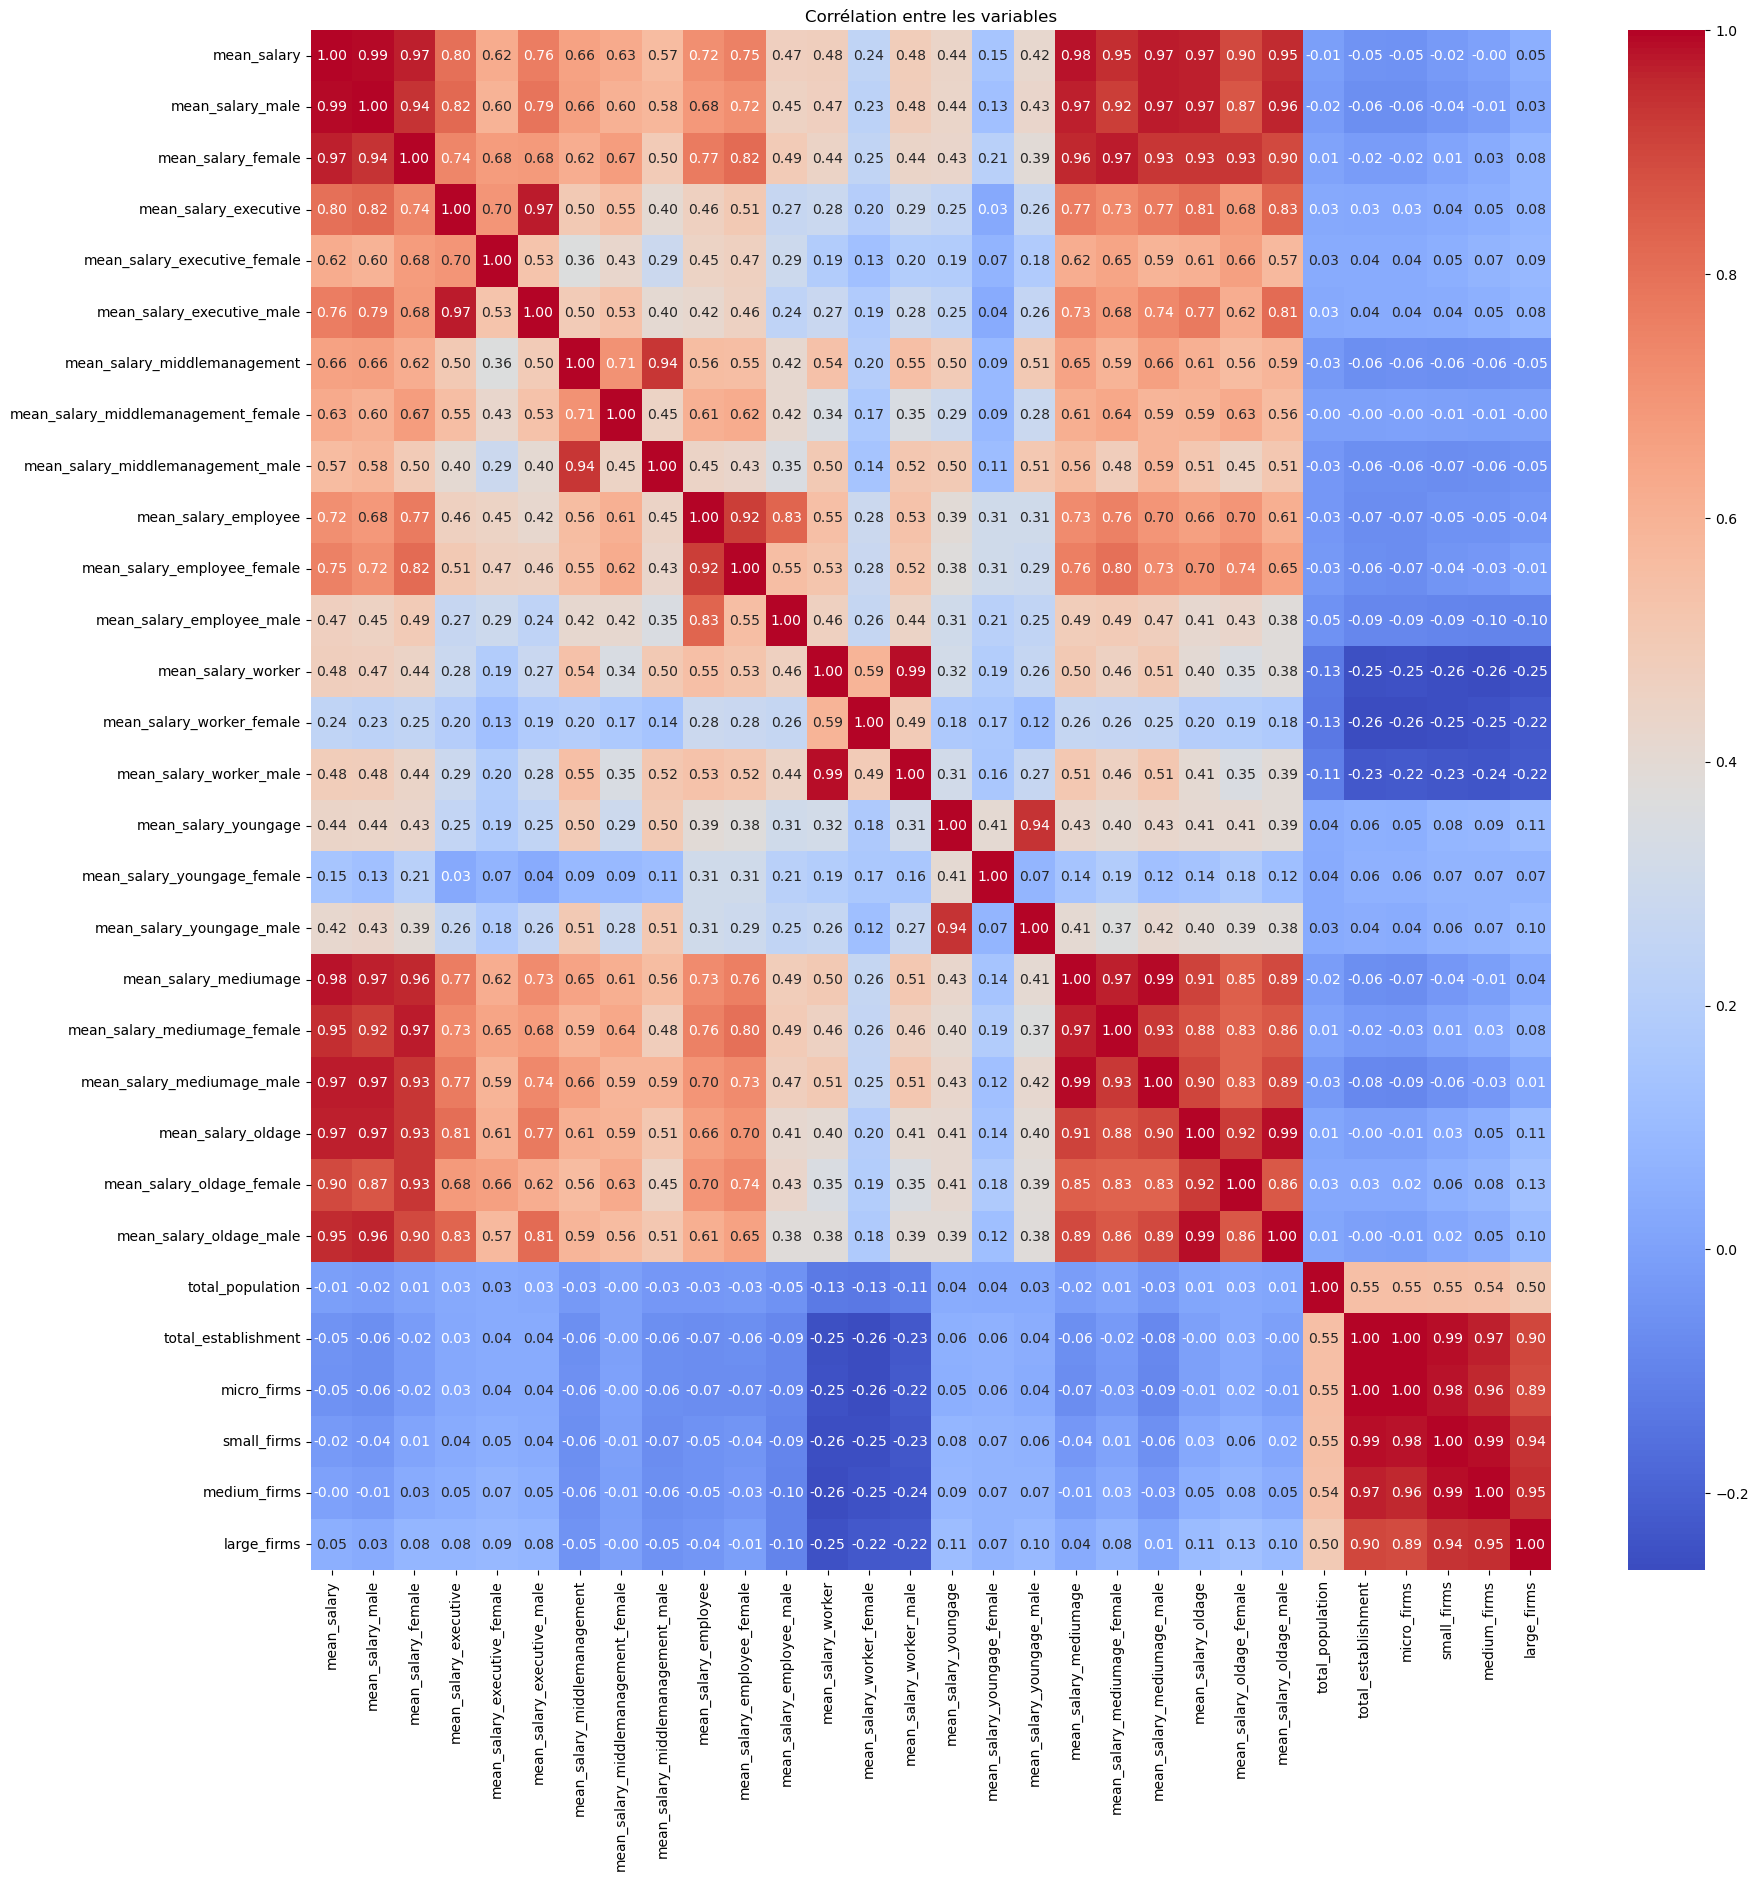

In [52]:
# Import des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Merge des DataFrames establishment et geography
est_geo_merge = pd.merge(establishment, geography[['CODGEO', 'departement_name']], on='CODGEO', how='inner')

# Merge des DataFrames est_geo_merge, salary_all et population
merged_data = pd.merge(est_geo_merge, salary_all, on='CODGEO', how='inner')
merged_data = pd.merge(merged_data, population, on='CODGEO', how='inner')

# Sélection des colonnes pertinentes pour la heatmap
heatmap_data = merged_data[['mean_salary', 'mean_salary_male', 'mean_salary_female',
                            'mean_salary_executive', 'mean_salary_executive_female', 'mean_salary_executive_male',
                            'mean_salary_middlemanagement', 'mean_salary_middlemanagement_female', 'mean_salary_middlemanagement_male',
                            'mean_salary_employee', 'mean_salary_employee_female', 'mean_salary_employee_male',
                            'mean_salary_worker', 'mean_salary_worker_female', 'mean_salary_worker_male',
                            'mean_salary_youngage', 'mean_salary_youngage_female', 'mean_salary_youngage_male',
                            'mean_salary_mediumage', 'mean_salary_mediumage_female', 'mean_salary_mediumage_male',
                            'mean_salary_oldage', 'mean_salary_oldage_female', 'mean_salary_oldage_male',
                            'total_population',
                            'total_establishment', 'micro_firms', 'small_firms', 'medium_firms', 'large_firms']]

# Calcul de la matrice de corrélation
correlation_matrix = heatmap_data.corr()

# Création de la heatmap
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les variables')
plt.show()
